In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Import contents of pacakge
import posfai2 as my

fig_file_name = 'fig3.pdf'
%matplotlib inline

In [2]:
style_file_name = f'fig.style'
s = """
    axes.linewidth:     0.5     # edge linewidth
    font.size:          7.0
    axes.labelsize:     7.0  # fontsize of the x any y labels
    xtick.labelsize:    7.0  # fontsize of the tick labels
    ytick.labelsize:    7.0  # fontsize of the tick labels
    legend.fontsize:      7.0
    legend.borderpad:     0.2  # border whitespace
    legend.labelspacing:  0.2  # the vertical space between the legend entries
    legend.borderaxespad: 0.2  # the border between the axes and legend edge
    legend.framealpha:    1.0 
    xtick.major.size:    2 
    ytick.major.size:    2
    """
with open(style_file_name, 'w') as f:
    f.write(s)
    
plt.style.use(style_file_name)

ohe_spec_str: ".+0+1+2+0x1+0x2+1x2+0x1x2"
ohe_spec_str: .+0+1+2+0x1+0x2+1x2+0x1x2
x_ohe.shape: (64, 1)
sim_spec_str: .+.+0+.+1+.+2+.+0+1+0x1+.+0+2+0x2+.+1+2+1x2+.+0+1+0x1+2+0x2+1x2+0x1x2
x_test.shape: (64, 1)
Time for computation to complete: 0.070 sec.
M: 64
gamma: 37
T_decom @ x_ohe == x_dist for 10/10 seqs
T@T_inv == I: True
All 370 dot products between the 37 gauge vectors and the 10 one-hot encoded sequences are zero:  True
Unique elements of gauge basis [-1  1]


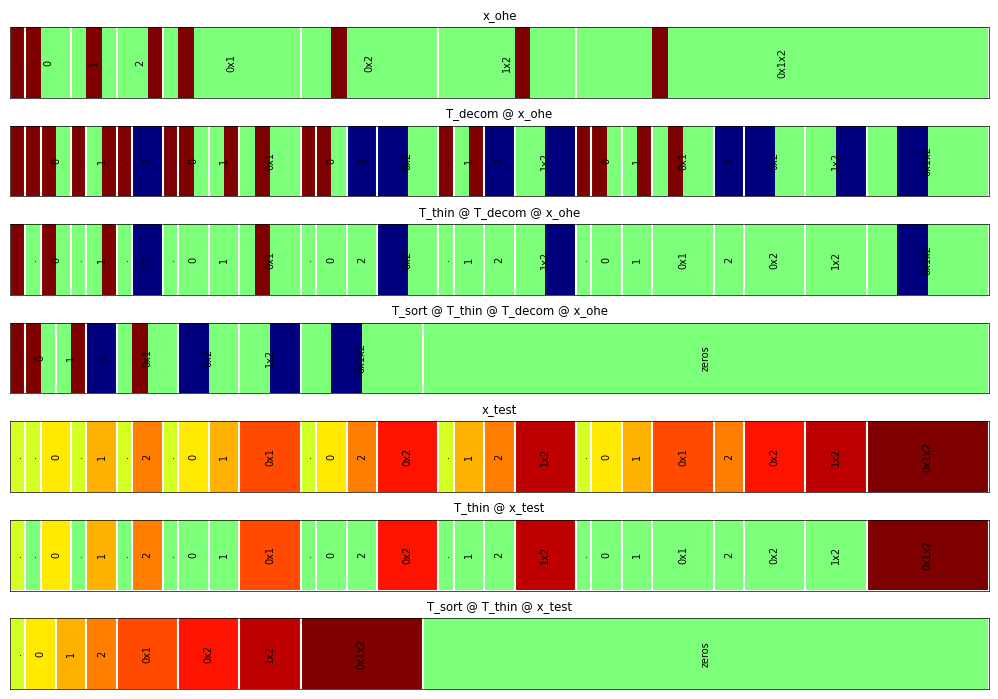

In [3]:
seq = 'ABC'
alphabet = 'ABC'
alpha=len(alphabet)
ohe_spec_str = my.get_ohe_spec_str(L=len(seq), n_order=3, n_adj=3)
print(f'ohe_spec_str: "{ohe_spec_str}"')
info_dict = my.test_distillation(seq, 
                                 ohe_spec_str, 
                                 alphabet=alphabet,
                                 num_test_seqs=10,
                                 figsize=[10, 7], 
                                 show_vecs=True,
                                 show_annotations=True,
                                 show_xticks=False)

In [4]:
show_vecs=True
show_annotations=True
show_xticks=False
num_test_seqs=100
sim_spec_str = info_dict['sim_spec_str']
M = info_dict['M']
gamma = info_dict['gamma']
x_ohe = info_dict['x_ohe']
T_decom = info_dict['sparse_intermediates']['T_decom']
T_thin = info_dict['sparse_intermediates']['T_thin']
T_sort = info_dict['sparse_intermediates']['T_sort']
T = info_dict['T']
downshift = .15

# Compute ohe vlines
parts = ohe_spec_str.split('+')
ohe_vlines = []
offset = 0
ohe_vlines.append(offset - .5)
for part in parts:
    if part == '.':
        m = 1
    else:
        num_poss = len(part.split('x'))
        m = alpha ** (num_poss)
    offset += m
    ohe_vlines.append(offset - .5)

ohe_annotations = []
for part_num, part in enumerate(parts):
    y = 0.5*(ohe_vlines[part_num] + ohe_vlines[part_num+1]) + downshift
    x = 0
    ohe_annotations.append([part, x, y])

# Compute vline xs
sim_vlines = []
parts = sim_spec_str.split('+')
offset = 0
sim_vlines.append(offset - .5)
for part in parts:
    if part == '.':
        m = 1
    else:
        num_poss = len(part.split('x'))
        m = (alpha - 1) ** (num_poss)
    offset += m
    sim_vlines.append(offset - .5)

# Comptue sim annotations
sim_annotations = []
for part_num, part in enumerate(parts):
    y = 0.5*(sim_vlines[part_num] + sim_vlines[part_num+1]) + downshift
    x = 0
    sim_annotations.append([part, x, y])

# Comptue thin annotations
thin_annotations = []
part_set = set([])
for part_num, part in enumerate(parts):
    if part not in part_set:
        part_set.add(part)
    else:
        part = 'zeros'
    y = 0.5*(sim_vlines[part_num] + sim_vlines[part_num+1]) + downshift
    x = 0
    thin_annotations.append([part, x, y])

# Compute dist vlines and annotations
dist_vlines = []
dist_annotations = []
part_set = set([])
offset = 0
dist_vlines.append(offset - .5)
for i, part in enumerate(parts):
    if not part in part_set:
        part_set.add(part)
        if part == '.':
            m = 1
        else:
            num_poss = len(part.split('x'))
            m = (alpha - 1) ** (num_poss)
        y = offset + 0.5*m - .5 + downshift
        x = 0
        offset += m
        dist_vlines.append(offset - .5)
        dist_annotations.append([part, x, y])
    else:
        pass;
if offset < M:
    y = offset + 0.5*gamma - .5 + downshift
    x = 0
    dist_annotations.append(['zeros', x, y])
    dist_vlines.append(M-.5)



M=64
gamma=37


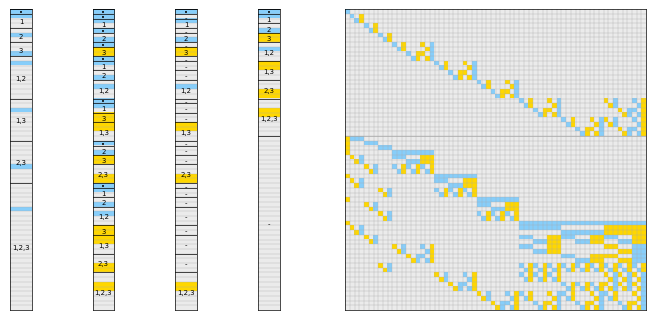

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

cmap = LinearSegmentedColormap.from_list('my_cmap', 
                                         colors=['gold', .925*np.ones(3), 'lightskyblue'],
                                         N=3)
def show_vec(ax,
             vec,
             annotations,
             vlines,
             title=None):

    test_style_dict = {'color':'k',
                       'ha':'center',
                       'va':'center',
                       'rotation':0,
                       'size':5}
    
    # Show x_ohe
    M = len(vec)
    ax.tick_params(left=True, right=True)
    ax.matshow(np.asmatrix(vec), vmin=-1, vmax=1, cmap=cmap,)
    ax.set_title(title)
    ax.set_aspect('auto')
    ax.set_yticks([])
    #ax.set_yticks(range(M))
    ax.set_yticklabels([])
    ax.set_xticks([])
    for m in range(M-1):
        ax.axhline(m+.5, color='darkgray', linewidth=.25)        
    for x in vlines:
        ax.axhline(x, color='k', linewidth=.5)
    for part, x, y in annotations:
        if part=='.':
            part = '\u2022'
        elif part=='zeros':
            part = '-'
        else:
            part = ','.join([str(int(p)+1) for p in part.split('x')])
            #part = part.replace('x',',')
        ax.text(s=part, x=x, y=y, **test_style_dict)

fig = plt.figure(figsize=[6.8, 3.4])
gs = GridSpec(1, 16, figure=fig)

# Show vectors
show_vec(ax=plt.subplot(gs[0]),
         vec=x_ohe,
         annotations=ohe_annotations,
         vlines=ohe_vlines)
         #title=r'$\vec{x}$')

show_vec(ax=plt.subplot(gs[2]),
         vec=T_decom @ x_ohe,
         annotations=sim_annotations,
         vlines=sim_vlines)

show_vec(ax=plt.subplot(gs[4]),
         vec=T_thin @ T_decom @ x_ohe,
         annotations=thin_annotations,
         vlines=sim_vlines)

show_vec(ax=plt.subplot(gs[6]),
         vec=T_sort @ T_thin @ T_decom @ x_ohe,
         annotations=dist_annotations,
         vlines=dist_vlines)
         #title=r'$\vec{x}_\mathrm{dist} \oplus \vec{0}_\gamma$')

ax = plt.subplot(gs[8:])
ax.matshow(T.todense(), cmap=cmap, vmin=-1, vmax=1)
y = M-gamma-.5
ax.axhline(y, color='darkgray', linewidth=.5)
ax.tick_params(left=True, right=True, top=True, bottom=True)
ax.set_yticks([])
#ax.set_yticks(range(M))
ax.set_yticklabels([])
ax.set_xticks([])
#ax.set_xticks(range(M))
ax.set_xticklabels([])
#ax.set_title('$T = T_\mathrm{sort}\, T_\mathrm{thin}\, T_\mathrm{decom}$')

for m in range(M-1):
    ax.axhline(m+.5, color='darkgray', linewidth=.25) 
    ax.axvline(m+.5, color='darkgray', linewidth=.25)  

fig.tight_layout(pad=2)
fig.savefig(fig_file_name, dpi=600, transparent=True)

print(f'M={M}')
print(f'gamma={gamma}')

In [6]:
R = np.asmatrix([
    [0, -1],
    [1, -1]
])
print(f'R:\n{R}')
print(f'R@R:\n{R@R}')
print(f'R@R@R:\n{R@R@R}')
print(f'inv(R.T):\n{np.linalg.inv(R.T)}')

R:
[[ 0 -1]
 [ 1 -1]]
R@R:
[[-1  1]
 [-1  0]]
R@R@R:
[[1 0]
 [0 1]]
inv(R.T):
[[-1. -1.]
 [ 1.  0.]]


In [7]:
np.linalg.inv(np.kron(R,R).T)

matrix([[ 1.,  1.,  1.,  1.],
        [-1., -0., -1., -0.],
        [-1., -1., -0., -0.],
        [ 1.,  0.,  0.,  0.]])

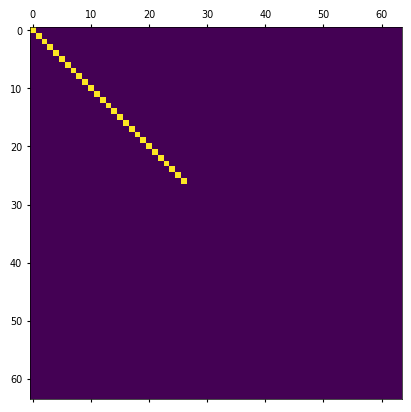

In [8]:
x_ohe.shape
import scipy.sparse as sp
i_vals = range(M-gamma)
j_vals = range(M-gamma)
data = np.ones(M-gamma, dtype=np.int64)
I_S = sp.coo_array((data, (i_vals, j_vals)), shape=(M, M)).tocsc()
plt.matshow(I_S.todense())

In [9]:
np.random.seed(0)

def project_theta(theta, info_dict):

    # Get T and T_inv
    T = info_dict['T']
    T_inv = info_dict['T_inv']

    # Create I_S
    i_vals = range(M-gamma)
    j_vals = range(M-gamma)
    data = np.ones(M-gamma, dtype=np.int64)
    I_S = sp.coo_array((data, (i_vals, j_vals)), shape=(M, M)).tocsc()

    # Compute theta_fixed by serial multiplicaiton
    # theta_fixed = theta.copy()
    # for mat in [T_inv.T, I_S, T.T]:
    #     theta_fixed = mat @ theta_fixed
    theta_fixed = T.T @ I_S @ T_inv.T @ theta

    # # Create I_G
    # i_vals = range(M-gamma,M)
    # j_vals = range(M-gamma,M)
    # data = np.ones(gamma, dtype=np.int64)
    # I_G = sp.coo_array((data, (i_vals, j_vals)), shape=(M, M)).tocsc()
    # theta_proj = theta.copy()
    # for mat in [T_inv.T, I_G, T.T]:
    #     theta_proj = mat @ theta_proj
    # theta_fixed = theta - theta_proj
        
    return theta_fixed

# Create random parameter vector
theta = np.asmatrix(np.random.randn(M)).T

# Project parameter vector
theta_fixed = project_theta(theta, info_dict)

# Check that theta_fixed is perpendicular to gauge basis
G_basis = info_dict['G_basis']
theta_fixed.T @ G_basis

array([[-3.74225278, -3.74225278, -3.74225278, -3.74225278,  1.85060112,
         0.25146848, -2.05608608,  3.33647317, -3.74225278,  1.85060112,
         0.25146848,  0.64018525,  1.94528353, -3.74225278, -2.05608608,
         3.33647317,  0.64018525,  1.94528353, -3.74225278,  1.85060112,
         0.25146848, -2.05608608,  3.33647317,  3.19353941,  0.92432103,
         2.74830613, -0.55136716,  0.64018525,  1.94528353, -0.76630807,
         3.72530099,  0.88876692,  3.58830592, -2.5289309 , -3.18212005,
        -2.87824734, -2.04178376]])

In [10]:
# Get T and T_inv
T = info_dict['T']
T_inv = info_dict['T_inv']

# Create I_S
i_vals = range(M-gamma)
j_vals = range(M-gamma)
data = np.ones(M-gamma, dtype=np.int64)
I_S = sp.coo_array((data, (i_vals, j_vals)), shape=(M, M)).tocsc()

# Create I_G
i_vals = range(M-gamma,M)
j_vals = range(M-gamma,M)
data = np.ones(gamma, dtype=np.int64)
I_G = sp.coo_array((data, (i_vals, j_vals)), shape=(M, M)).tocsc()

# Create I
I = sp.eye(M)

# Get G_basis
G_basis = info_dict['G_basis']

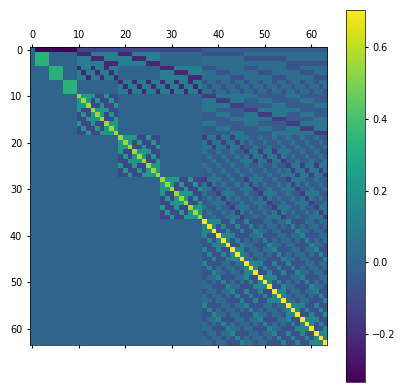

In [11]:
P = (T.T) @ I_G @ (T_inv.T)
plt.matshow(P.todense())
plt.colorbar()

P @ P == P:


np.True_

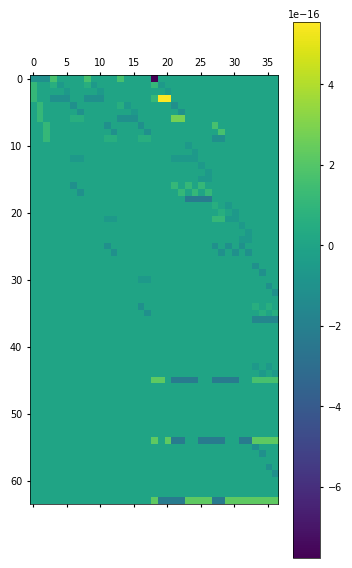

In [12]:
#result = P @ (T.T[:,-gamma:])

#P = T.T @ I_S @ T_inv.T
P = I - T.T @ I_G @ T_inv.T

theta = np.random.rand(M).reshape([M,1])
theta_fixed = P @ theta

#result =  P @ T.T[:,-gamma:]
G_basis = info_dict['G_basis']
result = P @ G_basis
plt.matshow(result.todense())
plt.colorbar()

print('P @ P == P:')
np.all(np.isclose((P @ P).todense(),P.todense()))

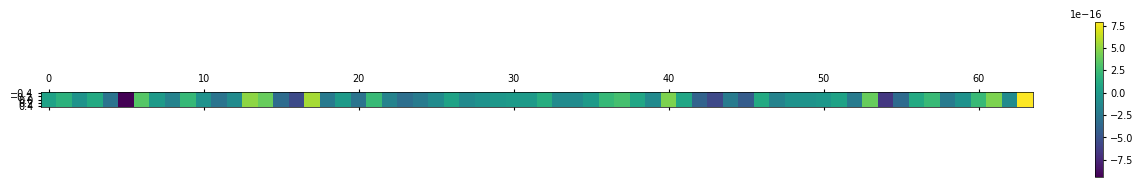

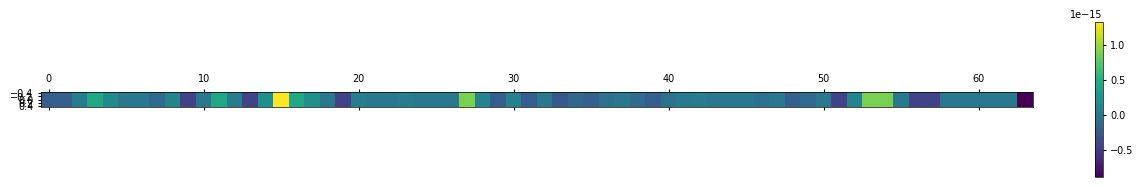

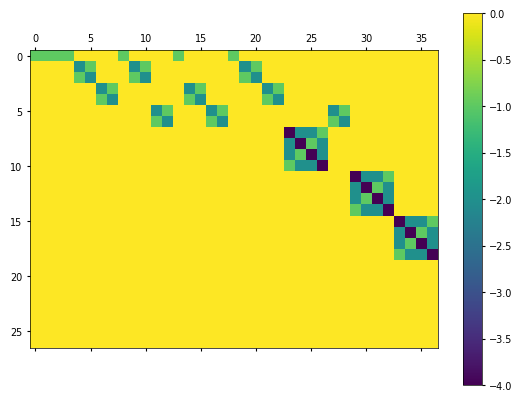

In [13]:
# This shows that the projection matrix zeroes out linear combinations of G_basis vectors
G_coeffs = np.random.randn(gamma).reshape([gamma,1])
G_vec = G_basis @ G_coeffs
result = P @ G_vec
plt.matshow(result.T)
plt.colorbar()

# This shows that the projection matrix does not affect linear combinations of S_basis vectors
S_basis = T.T[:,:M-gamma]
S_coeffs = np.random.randn(M-gamma).reshape([M-gamma,1])
S_vec = S_basis @ S_coeffs
result = S_vec - P @ S_vec
plt.matshow(result.T)
plt.colorbar()

# But S_basis is *not* orthogonal to G_basis
result = S_basis.T @ G_basis
plt.matshow(result.todense())
plt.colorbar()

# This means that P @ theta is *not* in the embedding space. But it is gauge-fixed.